# Image Hand Gesture Preprocessing

In [1]:
import cv2
import numpy as np
img = cv2.imread("/home/zadmin/Desktop/capture5.jpeg")
blurred = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise
edge=cv2.Canny(blurred,50,100)
contours, hierarchy = cv2.findContours(edge,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (0, 255, 0),2)
cv2.imshow('contour',img)
cv2.imshow('canny',edge)
def edgedetect (channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255; # Some values seem to go above 255. However RGB channels has to be within 0-255
    return sobel

edgeImg = np.max( np.array([ edgedetect(blurred[:,:, 0]), edgedetect(blurred[:,:, 1]), edgedetect(blurred[:,:, 2]) ]), axis=0 )
mean = np.mean(edgeImg);
# Zero any value that is less than mean. This reduces a lot of noise.
edgeImg[edgeImg <= mean] = 0;
cv2.namedWindow("sobel", cv2.WINDOW_NORMAL)
cv2.imshow('sobel',edgeImg)'''


'''cv2.namedWindow("input", cv2.WINDOW_NORMAL)
cv2.namedWindow("img", cv2.WINDOW_NORMAL)
im = cv2.imread("/home/zadmin/Desktop/capture5.jpeg")
cv2.imshow('input',im)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
blurred = cv2.GaussianBlur(thresh, (5, 5), 0) # Remove noise
cv2.imshow('img',blurred)'''
if(cv2.waitKey(0)==ord('q')):
    cv2.destroyAllWindows()



In [9]:
def edgedetect (channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255; # Some values seem to go above 255. However RGB channels has to be within 0-255
    return sobel

# Video Hand Gesture Preprocessing

In [1]:
import cv2 #image processing library-opencv
import numpy as np

cam = cv2.VideoCapture(0)
# Add the location for static image
while True:
    ret, frame = cam.read()#frame-by-frame capturing
    frame = cv2.flip(frame,1)#frame flipping
    boxFrame=cv2.rectangle(frame, (325,50),(600,400), (0,255,0), thickness=2)#creates a box area for hand gesture
    croppedBox=boxFrame[48:402, 323:602] #image cropping using array slicing
    blurred = cv2.GaussianBlur(croppedBox, (5, 5), 0) # Remove noise
    cannyEdge=cv2.Canny(blurred,50,100) #canny edge detection on cropped image
    cv2.imshow("Live Video", frame)
    cv2.imshow('Canny video',cannyEdge)
    if(cv2.waitKey(1)==ord('q')):
        break
cam.release()#removes the camera
cv2.destroyAllWindows()#destroies all the windows

[[0. 0. 0. ... 0. 0. 0.]]


(1, 3600)

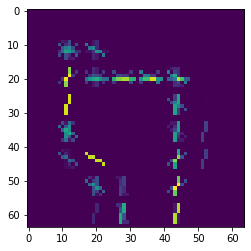

In [11]:
from skimage.feature import hog
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread('/home/zadmin/Documents/training_set/A/A_TRAIN_1.png')
hog_images = []
hog_features = []
fd,hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
hog_images.append(hog_image)
hog_features.append(fd)
print(np.array(hog_features,'float64'))
plt.imshow(hog_image)
np.array(hog_features).shape

In [2]:
import os
from skimage.feature import hog
from tqdm import tqdm_notebook as tqdm
import cv2
import numpy as np
basePath='/home/zadmin/Desktop/python_project/_data_'
filelist=os.listdir(basePath);
hogA=[]
hogB=[]
hogC=[]
labelA=[]
labelB=[]
labelC=[]
for folder in tqdm(filelist):
    if(folder=='A'):
        path=os.listdir(basePath+'/'+folder)
        for image in path:
            imagePath=basePath+'/'+folder+'/'+image
            im=cv2.imread(imagePath)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
            #im = cv2.Canny(im, 150,200) 
            img=np.array(im)
            fd,hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
            hogA.append(fd)
            labelA.append(folder)
    elif(folder=='B'):
        path=os.listdir(basePath+'/'+folder)
        for image in path:
            imagePath=basePath+'/'+folder+'/'+image
            im=cv2.imread(imagePath)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            #im = cv2.Canny(im, 150,200) 
            img=np.array(im)
            fd,hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
            hogB.append(fd)
            labelB.append(folder)
    else:
        path=os.listdir(basePath+'/'+folder)
        for image in path:
            imagePath=basePath+'/'+folder+'/'+image
            im=cv2.imread(imagePath)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            #im = cv2.Canny(im, 150,200) 
            img=np.array(im)
            fd,hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
            hogC.append(fd)
            labelC.append(folder)

In [3]:
import pandas as pd
dataB=pd.DataFrame(data=hogB)
dataB['label']=np.array(labelB)
sum([True for idx,row in dataB.iterrows() if any(row.isnull())])
updatedB=dataB.dropna()
print(updatedB.shape)
updatedB.head()

(2500, 14401)


,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,label
0,0.049851,0.027656,0.016999,0.030059,0.053378,0.028546,0.033941,0.025158,0.018953,0.041188,...,0.014395,0.005458,0.007746,0.007018,0.012553,0.006679,0.006551,0.007925,0.002614,B
1,0.141446,0.073542,0.091003,0.128000,0.157227,0.059215,0.067929,0.050552,0.010668,0.139506,...,0.010125,0.001416,0.002554,0.002976,0.008042,0.004798,0.004491,0.002886,0.000286,B
2,0.165371,0.095834,0.088309,0.102052,0.159379,0.087432,0.055197,0.034986,0.041555,0.123696,...,0.008391,0.002678,0.006727,0.004981,0.011366,0.004270,0.003823,0.002148,0.000959,B
3,0.114921,0.078137,0.060287,0.078607,0.141666,0.118266,0.046914,0.052149,0.038560,0.107559,...,0.041634,0.012031,0.014962,0.010314,0.042967,0.013217,0.023836,0.022785,0.008141,B
4,0.113160,0.037739,0.072612,0.029589,0.093394,0.046465,0.042099,0.034796,0.020551,0.131417,...,0.125142,0.039134,0.047325,0.041334,0.117301,0.044439,0.053031,0.046454,0.029622,B


In [4]:
dataC=pd.DataFrame(data=hogC)
dataC['label']=np.array(labelC)
sum([True for idx,row in dataC.iterrows() if any(row.isnull())])
updatedC=dataC.dropna()
print(updatedC.shape)
updatedC.head()

(1000, 14401)


,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,label
0,0.106045,0.058320,0.099286,0.133395,0.142276,0.086906,0.084565,0.050516,0.012483,0.119365,...,0.119759,0.059500,0.077060,0.037997,0.136137,0.067479,0.045576,0.060918,0.020292,C
1,0.112526,0.029665,0.085357,0.091684,0.114914,0.123403,0.091021,0.040220,0.019428,0.073248,...,0.120002,0.028798,0.057764,0.043752,0.105121,0.037031,0.044209,0.043885,0.007943,C
2,0.104472,0.074653,0.085031,0.099639,0.121079,0.098183,0.093640,0.030697,0.016319,0.120279,...,0.104676,0.072207,0.061867,0.054919,0.114894,0.038191,0.049724,0.032294,0.000000,C
3,0.108405,0.070375,0.074359,0.053926,0.113784,0.062607,0.062347,0.048556,0.016006,0.131735,...,0.116126,0.052108,0.064935,0.035972,0.113936,0.028096,0.054947,0.035012,0.023177,C
4,0.082292,0.051753,0.065472,0.116794,0.162668,0.130805,0.108094,0.075757,0.015100,0.149903,...,0.107718,0.047932,0.061333,0.111452,0.099760,0.070751,0.091190,0.053973,0.022664,C


In [6]:
dataA=pd.DataFrame(data=hogA)
dataA['label']=np.array(labelA)

In [7]:
sum([True for idx,row in dataA.iterrows() if any(row.isnull())])

0

In [10]:
updatedA=dataA.dropna()
print(updatedA.shape)
updatedA.head()

(2500, 14401)


,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,label
0,0.103011,0.051108,0.081125,0.091416,0.155064,0.072517,0.082809,0.066618,0.019926,0.161881,...,0.120323,0.090196,0.106965,0.079412,0.084593,0.047053,0.095214,0.077044,0.025402,A
1,0.155456,0.029004,0.060360,0.098050,0.234798,0.077360,0.117829,0.084474,0.028823,0.134247,...,0.024806,0.015239,0.014538,0.014079,0.023626,0.016293,0.016321,0.007332,0.003296,A
2,0.120884,0.031742,0.086653,0.061639,0.155769,0.146499,0.053401,0.061615,0.019520,0.168240,...,0.012781,0.004197,0.006807,0.006592,0.014270,0.007088,0.005055,0.003978,0.002543,A
3,0.102697,0.048083,0.067512,0.077043,0.135787,0.091812,0.074070,0.035150,0.020695,0.114334,...,0.026727,0.010651,0.016448,0.016032,0.029850,0.022567,0.013472,0.007538,0.008029,A
4,0.142672,0.051293,0.094336,0.105314,0.152181,0.094733,0.130960,0.107556,0.023419,0.127932,...,0.007635,0.006396,0.005358,0.005026,0.009544,0.006936,0.005337,0.004824,0.000308,A


In [11]:
totalData=pd.concat([updatedA, updatedB,updatedC],axis=0)

In [12]:
totalData.reset_index(drop=True)
totalData = totalData.sample(frac=1).reset_index(drop=True)
print(totalData.shape)
totalData.head(20)

(6000, 14401)


,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,label
0,0.020726,0.009348,0.014412,0.010559,0.022347,0.012024,0.011195,0.014292,0.004773,0.018377,...,0.110997,0.050141,0.087924,0.061339,0.123405,0.031749,0.053743,0.026888,0.000000,B
1,0.133000,0.096100,0.049499,0.155315,0.155962,0.076269,0.079563,0.053968,0.016863,0.128957,...,0.006365,0.001557,0.004477,0.001957,0.007739,0.002200,0.003323,0.002018,0.001273,B
2,0.057074,0.046249,0.099653,0.364908,0.279684,0.103069,0.031743,0.022617,0.009698,0.039120,...,0.105915,0.039223,0.083573,0.035493,0.094477,0.046566,0.038580,0.048835,0.013873,C
3,0.110698,0.044729,0.094939,0.090715,0.124444,0.059836,0.080283,0.041398,0.018719,0.116925,...,0.115550,0.046155,0.073728,0.061439,0.141757,0.053475,0.075307,0.037877,0.014819,C
4,0.133415,0.035142,0.109333,0.063874,0.154986,0.100954,0.070919,0.055858,0.007435,0.144726,...,0.012974,0.001485,0.003915,0.004243,0.012733,0.006357,0.006622,0.004534,0.002944,B
5,0.126563,0.042079,0.069897,0.074189,0.150193,0.076694,0.102620,0.054473,0.026136,0.145684,...,0.107283,0.046496,0.073867,0.044951,0.102882,0.057491,0.047344,0.036464,0.018036,A
6,0.118520,0.059152,0.107312,0.103990,0.131097,0.089081,0.094121,0.083110,0.030624,0.106486,...,0.011037,0.004919,0.005731,0.005702,0.006601,0.006197,0.004476,0.002701,0.002422,A
7,0.108363,0.054762,0.064185,0.051662,0.112067,0.067170,0.095729,0.047828,0.035274,0.093938,...,0.010937,0.005976,0.007296,0.005664,0.013635,0.003833,0.004604,0.004829,0.001950,A
8,0.173915,0.069595,0.099451,0.061867,0.131517,0.108324,0.058043,0.054419,0.049252,0.118502,...,0.120990,0.079026,0.058518,0.074640,0.141089,0.072401,0.079158,0.069158,0.031330,B
9,0.141877,0.058510,0.110626,0.112482,0.138672,0.069550,0.067787,0.044334,0.016499,0.123346,...,0.126162,0.051398,0.068399,0.077822,0.143035,0.051201,0.053864,0.059498,0.014367,C


In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#dataDf=pd.DataFrame(data=totalData.iloc[:,0:14400])
data=totalData.iloc[:,0:14400]
labels=totalData['label']
# data =[[updatedA.shape],[updatedB.shape]]
# labels= [0,1]
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.3)
x_train =x_train.to_numpy()
y_train = y_train.to_numpy()
x_test =x_test.to_numpy()
y_test =y_test.to_numpy()
print(x_test.shape)
print(y_train)
clf = svm.SVC(gamma=0.001,C=100,kernel='poly')
clf.fit(x_train,y_train)

(1800, 14400)
['B' 'A' 'B' ... 'B' 'B' 'B']


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
predict=clf.predict(x_test)
from sklearn.metrics import accuracy_score
#print(x_test[11])
pre = clf.predict(x_test[0].reshape(1,14400))
print(pre)
print(accuracy_score(y_test,predict)*100)
#print(predict,y_test)

['A']
99.05555555555556


In [15]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = y_test
predicted = predict
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix:')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted)*100 )
print('Report:')
print(classification_report(actual, predicted) )

Confusion Matrix:
[[741  13   0]
 [  3 728   1]
 [  0   0 314]]
Accuracy Score : 99.05555555555556
Report:
              precision    recall  f1-score   support

           A       1.00      0.98      0.99       754
           B       0.98      0.99      0.99       732
           C       1.00      1.00      1.00       314

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800



In [23]:
from skimage.io import imread, imshow
from skimage.feature import hog
import pandas as pd
img = imread('A1407.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.Canny(img, 150,200) 
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
#dataNew=pd.DataFrame(data=fd)
#dataNew = np.array(dataNew)
dataNew = fd.reshape(1,14400)
#print(fd)
print(clf.predict(dataNew))
#print(dataNew)
#data = print(dataNew.iloc[1:0,:1])
#print(data)

['A']


In [16]:
from sklearn.externals import joblib 
filename = 'ABCimage.pkl'
joblib.dump(clf, filename)

/home/zadmin/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['ABCimage.pkl']

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
train_param=[{'C':[10**-4, 10**-2, 10**0, 10**2, 10**4], 'gamma':[10**-4,  10**-2,  10**0, 10**2, 10**4]}]
model=GridSearchCV(svc, train_param, scoring='roc_auc', cv=4, return_train_score=True)
model.fit(x_train, y_train)
print(model.best_estimator_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [70]:
best_alpha=model.best_params_
print(best_alpha)

{'C': 100, 'gamma': 0.0001}


In [18]:
import cv2
from skimage.feature import hog
from sklearn.externals import joblib 
import httplib2
filename = 'ABCimage.pkl'
clf = joblib.load(filename)
conn = httplib2.Http()

cam = cv2.VideoCapture(0)
img_text =" "
while(True):
    ret,frame = cam.read()
    frame = cv2.flip(frame,1)
    img2 = cv2.rectangle(frame,(50,50),(270,270),(255,255,0),0)
    img2 = img2[52:268,52:268]
    img2 = cv2.imwrite("1.png",img2)
    img = cv2.imread("1.png",1)
    #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    #img = cv2.Canny(img, 150,200) 
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
    dataNew = fd.reshape(1,14400)
    output = clf.predict(dataNew)
    img_text=output[0]
    print(output)
    
    if(img_text == "A"):
        cv2.putText(frame,"ON" , (20, 400), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0, 255), 3)
        conn.request("https://api.thingspeak.com/update?api_key=J1VMRI7DEEL55HUS&field1=50")
    if(img_text=="B"):
        cv2.putText(frame,"OFF", (20, 400), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0, 255), 3)
        conn.request("https://api.thingspeak.com/update?api_key=J1VMRI7DEEL55HUS&field1=100")
    if(img_text=="C"):
        cv2.putText(frame,"Put your hand in the box ", (20, 400), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0, 255), 3)
    cv2.imshow("gray",img)
    cv2.imshow("cam",frame)
    if cv2.waitKey(1) == 27:#press esc to close the all window
        break
        
cam.release()       
cv2.destroyAllWindows()


ValueError: Only images with 2 spatial dimensions are supported. If using with color/multichannel images, specify `multichannel=True`.